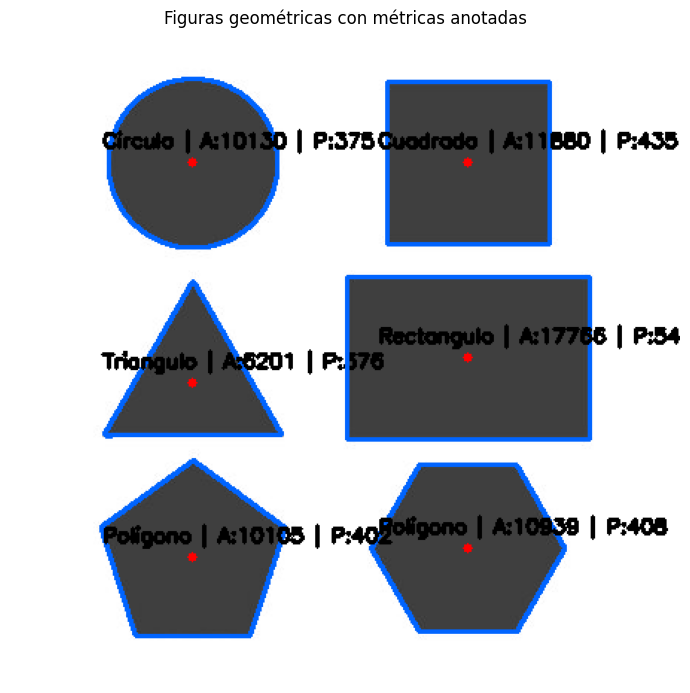

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga la imagen en escala de grises
def cargar_imagen(path):
    imagen = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return imagen
# Binariza la imagen usando umbral de Otsu (inverso)
def binarizar(imagen):
    binaria = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binaria

# Calcula área, perímetro y centroide del contorno
def calcular_metrica_basica(contorno):
    area = cv2.contourArea(contorno)
    perimetro = cv2.arcLength(contorno, True)
    momentos = cv2.moments(contorno)
    if momentos["m00"] != 0:
        cx = int(momentos["m10"] / momentos["m00"])
        cy = int(momentos["m01"] / momentos["m00"])
    else:
        cx, cy = -1, -1
    return area, perimetro, (cx, cy)

# Clasifica forma según número de lados aproximados
def clasificar_forma(contorno):
    peri = cv2.arcLength(contorno, True)
    approx = cv2.approxPolyDP(contorno, 0.03 * peri, True)
    lados = len(approx)

    if lados == 3:
        return 'Triangulo'
    elif lados == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspecto = w / float(h)
        return 'Cuadrado' if 0.95 < aspecto < 1.05 else 'Rectangulo'
    elif lados >= 8:
        return 'Circulo'
    else:
        return 'Poligono'

# Encuentra contornos y dibuja cada figura con sus métricas
def analizar_figuras(imagen_binaria, imagen_dibujo):
    contornos, _ = cv2.findContours(imagen_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contorno in contornos:
        area, perimetro, centro = calcular_metrica_basica(contorno)
        forma = clasificar_forma(contorno)

        # Dibuja el contorno y anota información
        cv2.drawContours(imagen_dibujo, [contorno], -1, (255, 100, 0), 2)
        texto = f"{forma} | A:{int(area)} | P:{int(perimetro)}"
        cv2.circle(imagen_dibujo, centro, 3, (0, 0, 255), -1)
        cv2.putText(imagen_dibujo, texto, (centro[0] - 60, centro[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 2)

    return imagen_dibujo

# Flujo principal
ruta_imagen = "../datos/figuras.jpg"
imagen_gris = cargar_imagen(ruta_imagen)
imagen_binaria = binarizar(imagen_gris)[1]
imagen_color = cv2.cvtColor(imagen_gris, cv2.COLOR_GRAY2BGR)

resultado = analizar_figuras(imagen_binaria, imagen_color)

plt.figure(figsize=(7, 7))
plt.imshow(cv2.cvtColor(resultado, cv2.COLOR_BGR2RGB))
plt.title("Figuras geométricas con métricas anotadas")
plt.axis('off')
plt.tight_layout()
plt.show()
